#  State-Of-Health Estimation of  Lithium-ion Pouch Cells Using Artificial Neural Network
Artificial Neural Network (ANN) has been used to estimate state-of-health (SOH) of lithium-ion pouch cells. The batteries were stored at different storage temperature (35°C and 60°C) and conditions (fully-discharged and fully-charged) and their capacity was recorded for the duration of 10 months at one-month intervals. 

## Library Imports

In [4]:
# Numpy and Pandas 
import numpy as np
import pandas as pd

# Vizualization
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

# Machine learning algorithms
from sklearn.neural_network import MLPRegressor

# Machine learning pipeline 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Regression Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Ignore ConvergenceWarning messages
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

# Check the fitted_model
from sklearn.exceptions import NotFittedError

# Save python obect to disk
import pickle

## Exploratory Analysis

In [1]:
df = pd.read_csv('soh.csv')
df.head()

NameError: name 'pd' is not defined

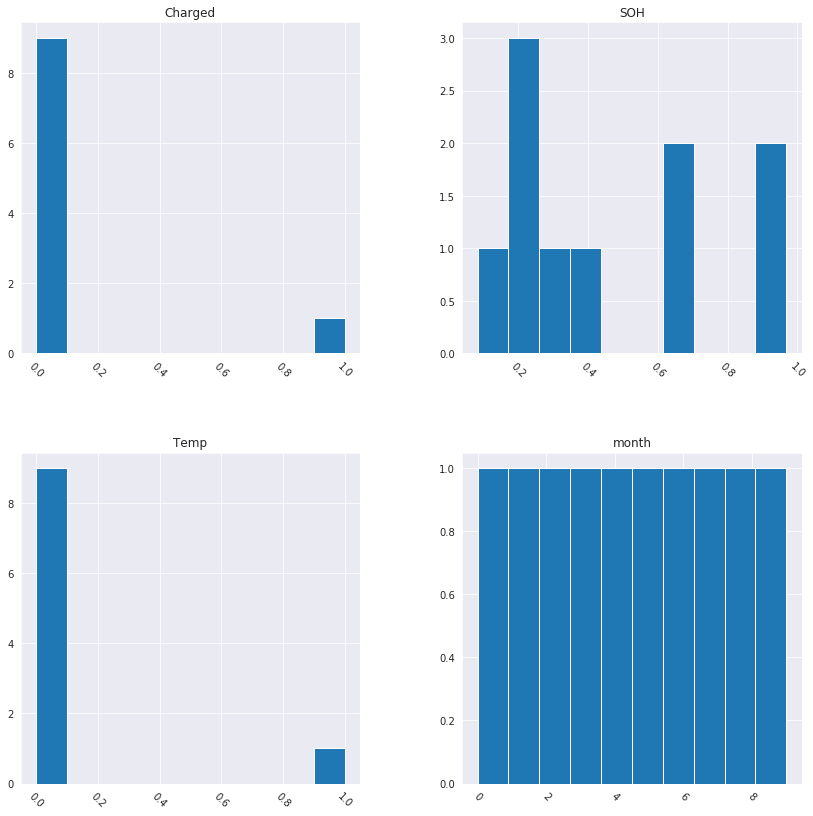

In [8]:
df.hist(figsize=(14,14), xrot=-45)
plt.show()

In [9]:
df.describe()

,SOH,month,Temp,Charged
count,10.000000,10.00000,10.000000,10.000000
mean,0.467514,4.50000,0.100000,0.100000
std,0.318451,3.02765,0.316228,0.316228
min,0.084971,0.00000,0.000000,0.000000
25%,0.226523,2.25000,0.000000,0.000000
50%,0.343562,4.50000,0.000000,0.000000
75%,0.663213,6.75000,0.000000,0.000000
max,0.968119,9.00000,1.000000,1.000000


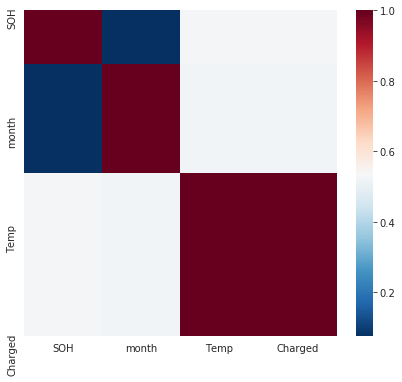

In [10]:
correlations = df.corr()
plt.figure(figsize=(7,6))
sns.heatmap(correlations, cmap='RdBu_r')
plt.show()

## Algorithm Selection

In [11]:
df['month'] = df['month'].astype(float)
df['Temp'] = df['Temp'].astype(float)
df['Charged'] = df['Charged'].astype(float)
y = df.SOH
X = df.drop('SOH', axis=1)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1234)
pipelines = {
    'mlp'   : make_pipeline(StandardScaler(), MLPRegressor(random_state=123))
}
print(X_train)
print(X_test)
print(pipelines)

   month  Temp  Charged
9    9.0   1.0      1.0
1    1.0   0.0      0.0
0    0.0   0.0      0.0
8    8.0   0.0      0.0
4    4.0   0.0      0.0
5    5.0   0.0      0.0
6    6.0   0.0      0.0
3    3.0   0.0      0.0
   month  Temp  Charged
7    7.0   0.0      0.0
2    2.0   0.0      0.0
{'mlp': Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mlpregressor',
                 MLPRegressor(activation='relu', alpha=0.0001,
                              batch_size='auto', beta_1=0.9, beta_2=0.999,
                              early_stopping=False, epsilon=1e-08,
                              hidden_layer_sizes=(100,),
                              learning_rate='constant',
                              learning_rate_init=0.001, max_iter=200,
                              momentum=0.9, n_iter_no_change=10,
                              nesterovs_momentum=True, power_t=0.5,
                 

In [18]:
# MLP hyperparameters
mlp_hyperparameters = {
    'mlpregressor__alpha': [0.0001, 0.01, 1],
    'mlpregressor__hidden_layer_sizes': [(3,), (5,), (7,), (10,), (40,)],
    'mlpregressor__activation': ['logistic', 'relu']
}

# Create hyperparameters dictionary
hyperparameters = {
    'mlp': mlp_hyperparameters
}
print(hyperparameters)

{'mlp': {'mlpregressor__alpha': [0.0001, 0.01, 1], 'mlpregressor__hidden_layer_sizes': [(3,), (5,), (7,), (10,), (40,)], 'mlpregressor__activation': ['logistic', 'relu']}}


In [31]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv=4, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

mlp has been fitted.


In [33]:
for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test)
        print (name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

mlp has been fitted.


## ANN performance

In [34]:
for name,model in fitted_models.items():
    pred = fitted_models[name].predict(X_test)
    print(name)
    print('R2:', r2_score(y_test, pred))
    print('MAE:', mean_absolute_error(y_test, pred))

mlp
R2: -2.355367279977198
MAE: 0.2040935125223492


## Insight & Analysis

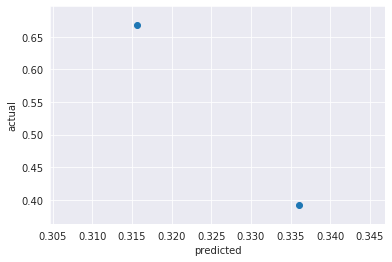

In [35]:
mlp_pred = fitted_models['mlp'].predict(X_test)
plt.scatter(mlp_pred, y_test)
plt.xlabel('predicted')                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
plt.ylabel('actual')
plt.show()

In [36]:
fitted_models['mlp'].best_estimator_

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mlpregressor',
                 MLPRegressor(activation='logistic', alpha=1, batch_size='auto',
                              beta_1=0.9, beta_2=0.999, early_stopping=False,
                              epsilon=1e-08, hidden_layer_sizes=(3,),
                              learning_rate='constant',
                              learning_rate_init=0.001, max_iter=200,
                              momentum=0.9, n_iter_no_change=10,
                              nesterovs_momentum=True, power_t=0.5,
                              random_state=123, shuffle=True, solver='adam',
                              tol=0.0001, validation_fraction=0.1,
                              verbose=False, warm_start=False))],
         verbose=False)

In [37]:
with open('MLP_SOH_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['mlp'].best_estimator_, f)